epochs=0, cost=1.07955002784729, W1=0.13703562319278717, W2=0.07879504561424255, b=[0.5169016]
epochs=200, cost=0.31833282113075256, W1=0.7767336368560791, W2=-0.6357905864715576, b=[-1.671697]
epochs=400, cost=0.2398236244916916, W1=0.8634783625602722, W2=-0.5346624851226807, b=[-2.906674]
epochs=600, cost=0.19474677741527557, W1=0.8391612768173218, W2=-0.3288426399230957, b=[-3.8300543]
epochs=800, cost=0.16400791704654694, W1=0.7806609272956848, W2=-0.10565754771232605, b=[-4.577796]
epochs=1000, cost=0.14144378900527954, W1=0.7115949392318726, W2=0.11137634515762329, b=[-5.208766]
epochs=1200, cost=0.1241447851061821, W1=0.6411639451980591, W2=0.31489548087120056, b=[-5.7554092]
epochs=1400, cost=0.11047599464654922, W1=0.573227047920227, W2=0.5030402541160583, b=[-6.2379513]
epochs=1600, cost=0.09942363947629929, W1=0.5093493461608887, W2=0.6760544180870056, b=[-6.6700096]
epochs=1800, cost=0.09031902998685837, W1=0.4500338137149811, W2=0.834985077381134, b=[-7.061234]
epochs=2000

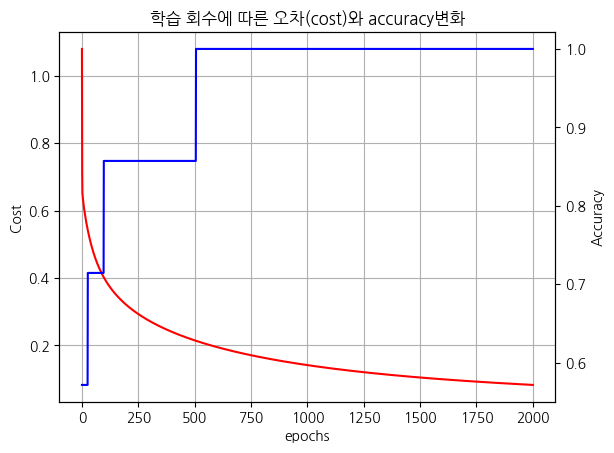

W = [[0.39528176]
 [0.9811358 ]]
b = -7.418734
y_data = [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
sigmoid = [[0.02448838]
 [0.05244103]
 [0.24554777]
 [0.83621544]
 [0.9677681 ]
 [0.9943685 ]
 [0.9990379 ]]
predicted = [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
Accuracy = 1.0


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 시드 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 값 (※주의: 반드시 float로 정의해 주어야 함)
x_data = np.array([[2, 3],[4, 3],[6, 4],[8, 6],[10, 7],[12, 8],[14, 9]], dtype=np.float32)  # shape=(7, 2)
y_data = np.array([0, 0, 0, 1, 1, 1, 1], dtype=np.float32).reshape(7, 1)   # shape=(7,1)

# 기울기, 절편 정의
W = tf.Variable(tf.random.uniform([2, 1], dtype=tf.float32))  # Shape=(2, 1)
b = tf.Variable(tf.random.uniform([1], dtype=tf.float32))     # Shape=(1,)

# 가설 함수 (시그모이드 함수)
def hypothesis(W, b):
    return tf.sigmoid(tf.matmul(x_data, W) + b)

# 손실 함수
def costFunc():
    return - tf.reduce_mean(y_data * tf.math.log(hypothesis(W, b)) 
                            + (1 - y_data) * tf.math.log(1 - hypothesis(W, b)))

# 그래프 함수
def graph():
    import matplotlib as mpl
    mpl.rc('font', family='NanumGothic') # 한글 설정
    mpl.rc('axes', unicode_minus=False)  # 음수부호 설정

    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()   # x축을 공유하는 두개의 y축
    ax0.set_title("학습 회수에 따른 오차(cost)와 accuracy변화")
    ax0.plot(cost_arr, 'r-', label="cost")
    ax0.set_ylabel("Cost")
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()

# 옵티마이저 정의
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

epoch_arr = []
cost_arr = []
accuracy_arr = []

# 학습 수행
for i in range(2001):  # epochs를 바꿔가며 accuracy 변화 체크
    with tf.GradientTape() as tape:
        current_cost = costFunc()
    grads = tape.gradient(current_cost, [W, b])
    opt.apply_gradients(zip(grads, [W, b]))
    
    if i % 200 == 0:
        print(f'epochs={i}, cost={current_cost.numpy()}, W1={W.numpy()[0,0]}, W2={W.numpy()[1,0]}, b={b.numpy()}')
    
    predicted = tf.cast(hypothesis(W, b) > 0.5, dtype=tf.float32)
    epoch_arr.append(i)
    cost_arr.append(current_cost.numpy())
    accuracy = np.mean(y_data == predicted)
    accuracy_arr.append(accuracy)

# 오차와 정확도 그래프 그리기 (x축 공유)
graph()

# 학습결과 인쇄
print("========================================================")
print("W =", W.numpy())
print("b =", b.numpy()[0])
print("y_data =", y_data)
print("sigmoid =", hypothesis(W, b).numpy())

print("predicted =", predicted.numpy())
print("Accuracy =", accuracy)
